# Expanded
`Here we will expand our current selected model`

**And see how it performs on other data**

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#setup
import os, sys
current_path = os.path.abspath('')
parent_path = current_path
source_path = f'{parent_path}\\src'
if not source_path in sys.path: sys.path.append(source_path)

#customs
from data_model import *
from data_helper import *
from config import *
setup()

Config finished!


## Load

In [3]:
choosen_currency = {
    'dirt' : ["Armourer's Scrap", "Orb of Alteration", "Chromatic Orb", "Regal Orb"],
    'low' : ["Vaal Orb", "Splinter of Chayula", "Prime Sextant"],
    'medium' : ["Divine Orb", "Xoph's Breachstone", "Mortal Ignorance"],
    'high' : ["Chayula's Breachstone", "Blessing of Chayula"]
}

in_names = ['X_train', 'X_val', 'y_train', 'y_val']

DATA = dict()
for tier_name in choosen_currency.keys():
    tier = DATA[tier_name] = dict()
    # tier = DATA[tier_name]
    for currency_name in choosen_currency[tier_name]:
        currency_data = tier[currency_name] = dict()
        for var_name in in_names:
            file_name = f'./data-training/{currency_name}.{var_name}.csv'
            currency_data[var_name] = pd.read_csv(file_name, index_col = 'Date', parse_dates=True)


In [7]:
print('------DATA------')
for t1 in DATA.keys():
    print('Tier: ', t1)
    for t2 in DATA[t1].keys():
        print('  ', t2)
        for t3 in DATA[t1][t2].keys():
            print('     ', t3, ':', DATA[t1][t2][t3].shape)

------DATA------
Tier:  dirt
   Armourer's Scrap
      X_train : (1713, 16)
      X_val : (88, 16)
      y_train : (1713, 5)
      y_val : (88, 5)
   Orb of Alteration
      X_train : (1724, 16)
      X_val : (88, 16)
      y_train : (1724, 5)
      y_val : (88, 5)
   Chromatic Orb
      X_train : (1724, 16)
      X_val : (88, 16)
      y_train : (1724, 5)
      y_val : (88, 5)
   Regal Orb
      X_train : (1724, 16)
      X_val : (88, 16)
      y_train : (1724, 5)
      y_val : (88, 5)
Tier:  low
   Vaal Orb
      X_train : (1723, 16)
      X_val : (88, 16)
      y_train : (1723, 5)
      y_val : (88, 5)
   Splinter of Chayula
      X_train : (1627, 16)
      X_val : (87, 16)
      y_train : (1627, 5)
      y_val : (87, 5)
   Prime Sextant
      X_train : (1665, 16)
      X_val : (87, 16)
      y_train : (1665, 5)
      y_val : (87, 5)
Tier:  medium
   Divine Orb
      X_train : (1719, 16)
      X_val : (88, 16)
      y_train : (1719, 5)
      y_val : (88, 5)
   Xoph's Breachstone
   

## Helper

### Metrics

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
def evaluate(model, X_val, y_val):
    pred = model.predict(X_val)
    mse = mean_squared_error(pred, y_val)
    mape = mean_absolute_percentage_error(pred, y_val)
    print('Result - MSE: ', mse, ' - MAPE: ', mape)

### Plotting

In [16]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

DPI_OUTPUT = 300
output_path = './images/output'

def plot_stepped_predictions(model, X_val, y_val, name,  prediction_step = 3):
    pred = pd.DataFrame(
        model.predict(X_val),
        index = y_val.index, columns = y_val.columns
    )
    palette = dict(palette='husl', n_colors=64)
    ax2 = y_val['y_step_1'].plot(**plot_params)
    ax2 = plot_multistep(pred, ax=ax2, palette_kwargs=palette, every=prediction_step)
    _ = ax2.legend(['Value', 'Forecast'])

    plot_name = f'{name}_stepped_predictions'
    plt.title(plot_name)
    plt.savefig(f'{output_path}/{plot_name}.png', dpi = DPI_OUTPUT)
    plt.show()


## Pipeline

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import RegressorChain

import matplotlib.image as mpimg

def pipeline_process(tier, name):
    print(f'{name}')
    img = mpimg.imread(f'./experiments/output/{name}_all_leagues_value.png')
    plt.imshow(img)
    plt.show()
    model = RegressorChain(base_estimator= RandomForestRegressor())
    X_train, X_val, y_train, y_val = DATA[tier][name].values()
    model.fit(X_train, y_train)

    evaluate(model, X_train, y_train)
    evaluate(model, X_val, y_val)

    plot_stepped_predictions(model, X_val, y_val, name)

## Let's Train

### Tier: Dirt

Armourer's Scrap


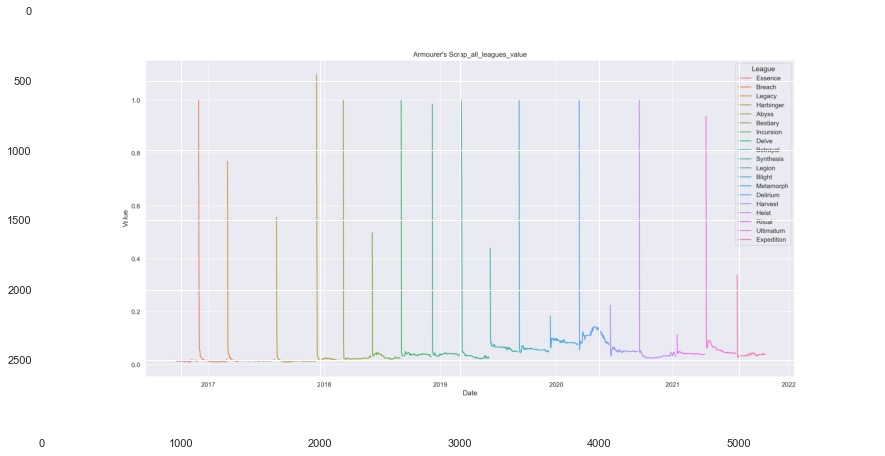

Result - MSE:  0.001293440331982236  - MAPE:  0.05233541792315709
Result - MSE:  9.893704688902277e-05  - MAPE:  0.1050299584918161


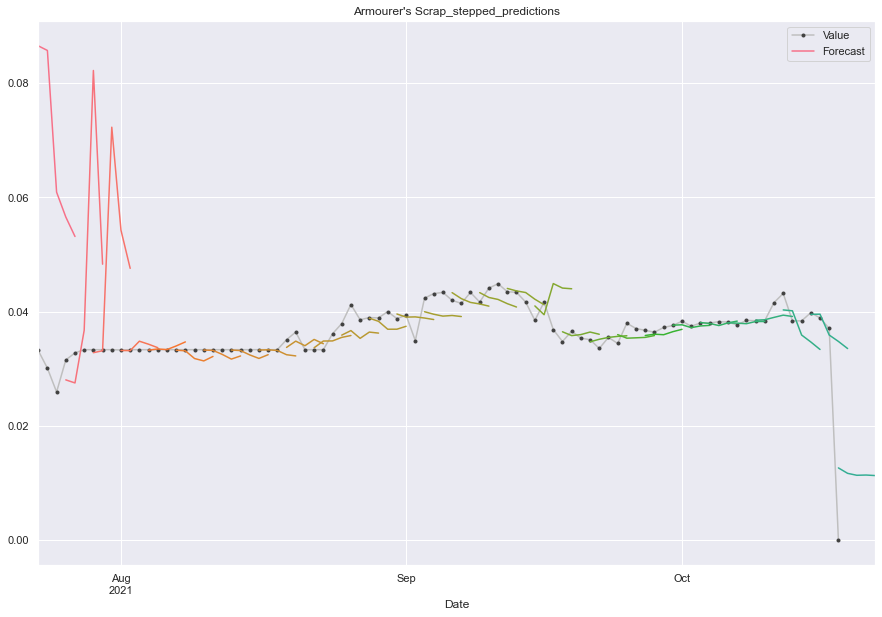

-------------------------------------
Orb of Alteration


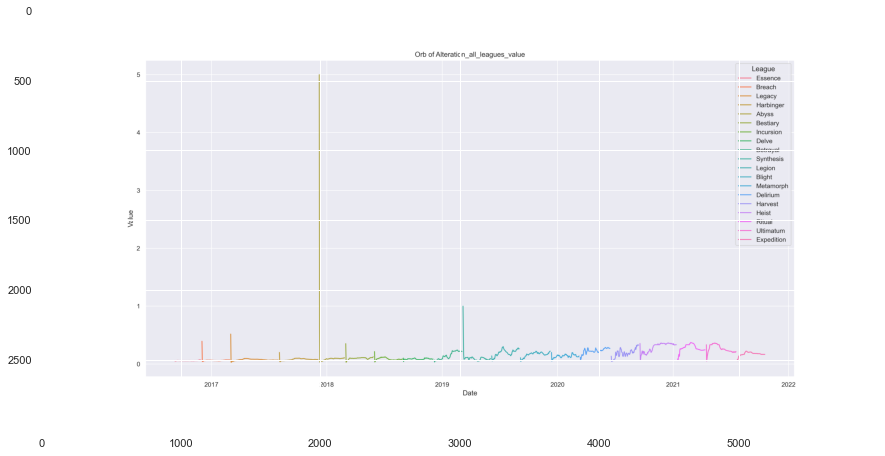

Result - MSE:  0.0038132509381050435  - MAPE:  0.047816480670709795
Result - MSE:  0.0011790851179200898  - MAPE:  0.09310526550655873


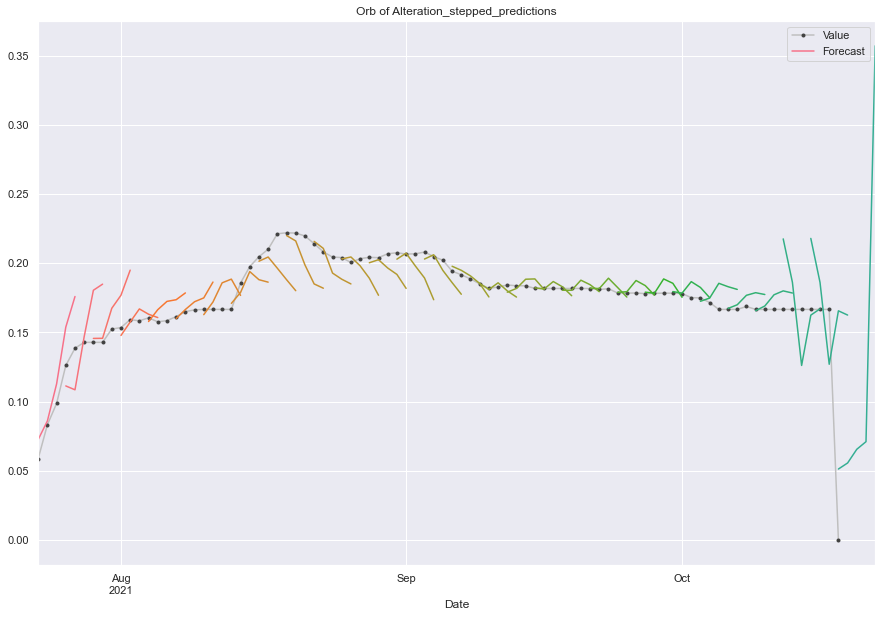

-------------------------------------
Chromatic Orb


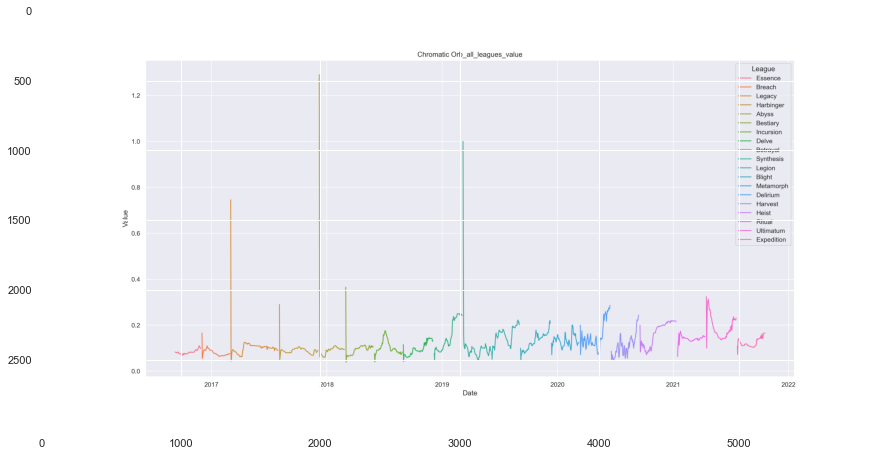

Result - MSE:  0.0008106920216936724  - MAPE:  0.0439105112524705
Result - MSE:  0.0004910473668290907  - MAPE:  0.0838830534725402


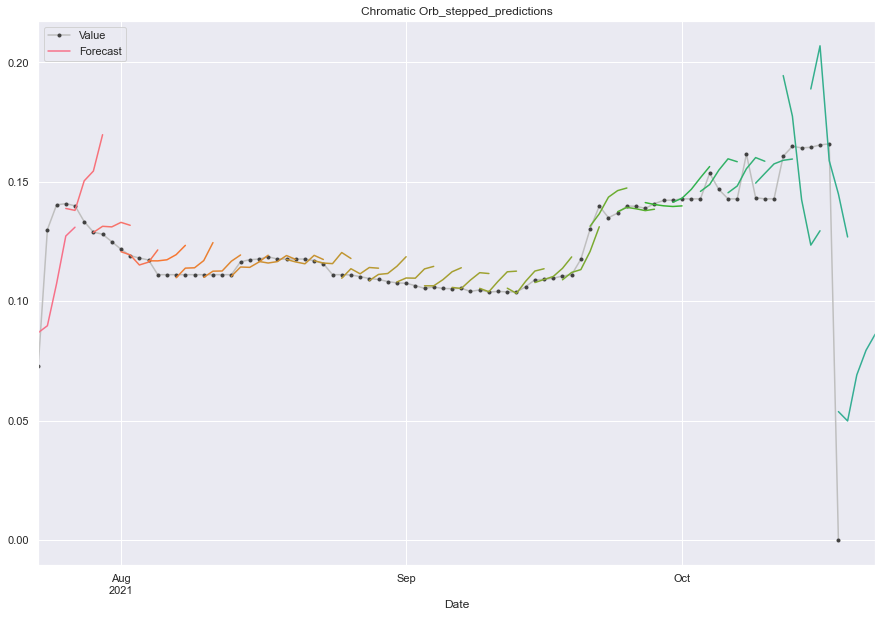

-------------------------------------
Regal Orb


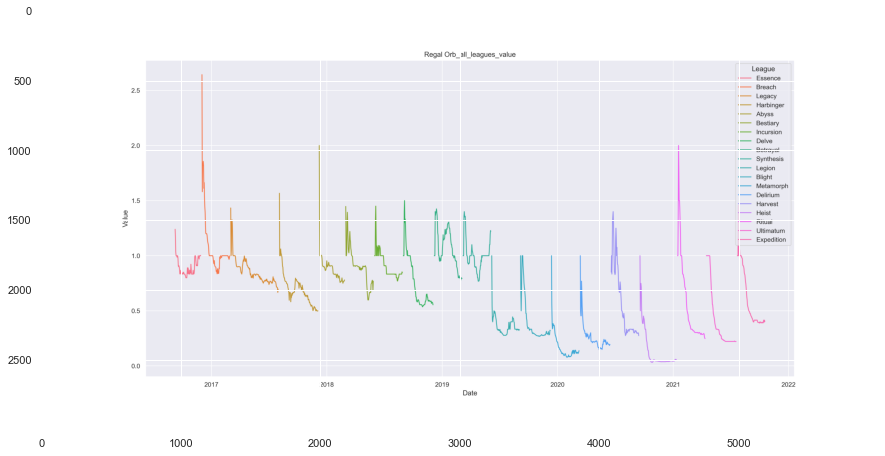

Result - MSE:  0.0032284527161146577  - MAPE:  0.026278481824298865
Result - MSE:  0.005737589068055918  - MAPE:  0.09249069180198885


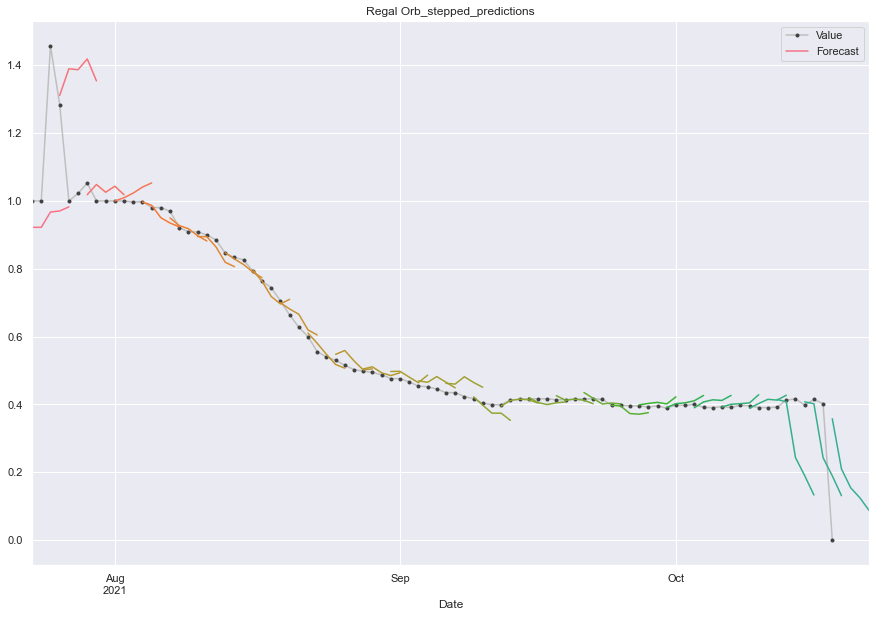

-------------------------------------


In [24]:
tier = 'dirt'
for currency_name in choosen_currency[tier]:
    pipeline_process(tier, currency_name)
    print('-------------------------------------')

### Tier: Low

Vaal Orb


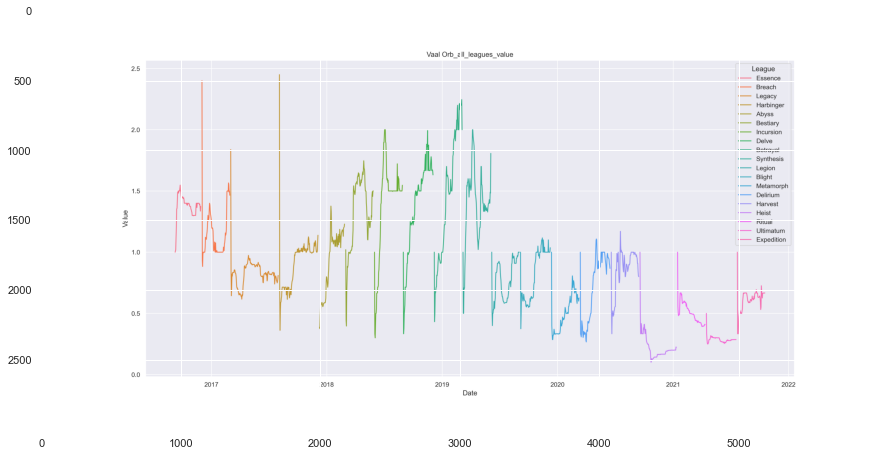

Result - MSE:  0.0071468498331799715  - MAPE:  0.03043181342327192
Result - MSE:  0.013613362876077121  - MAPE:  0.0864940160910777


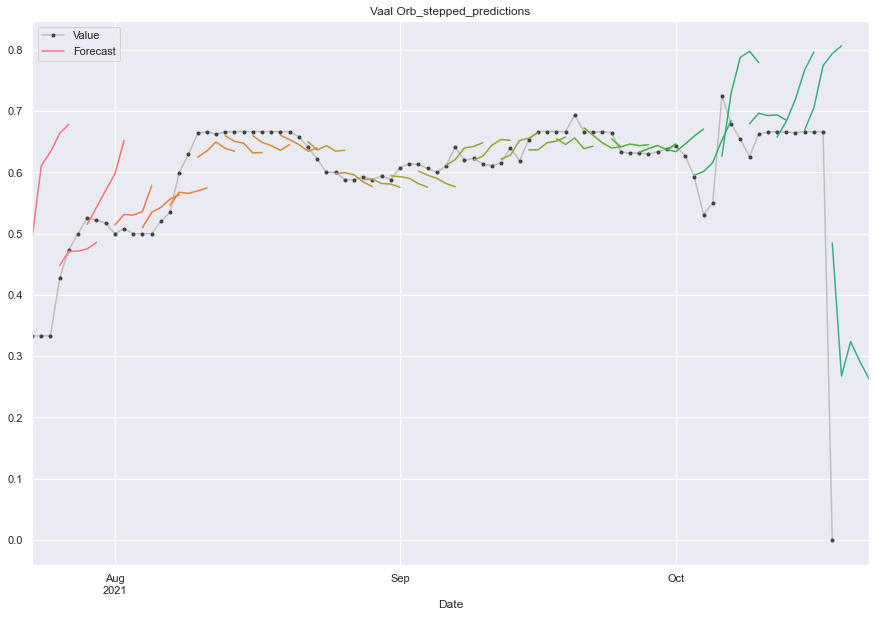

-------------------------------------
Splinter of Chayula


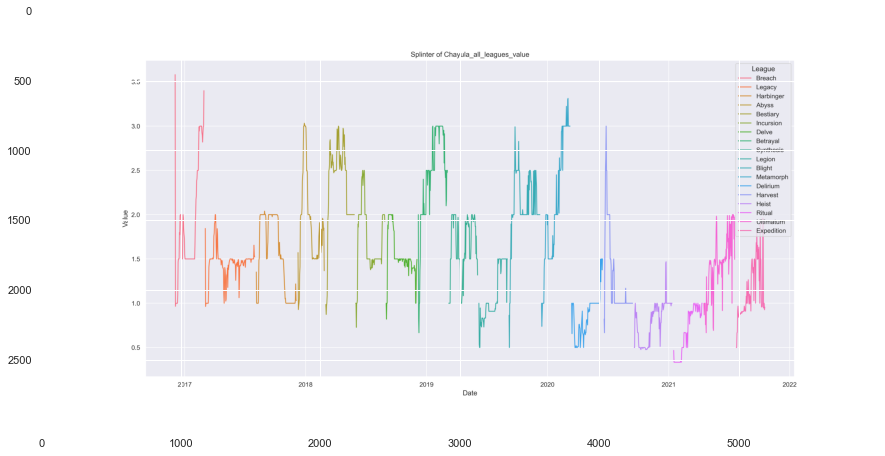

Result - MSE:  0.015918898590194012  - MAPE:  0.044347271589073436
Result - MSE:  0.097115485277206  - MAPE:  0.188499137690245


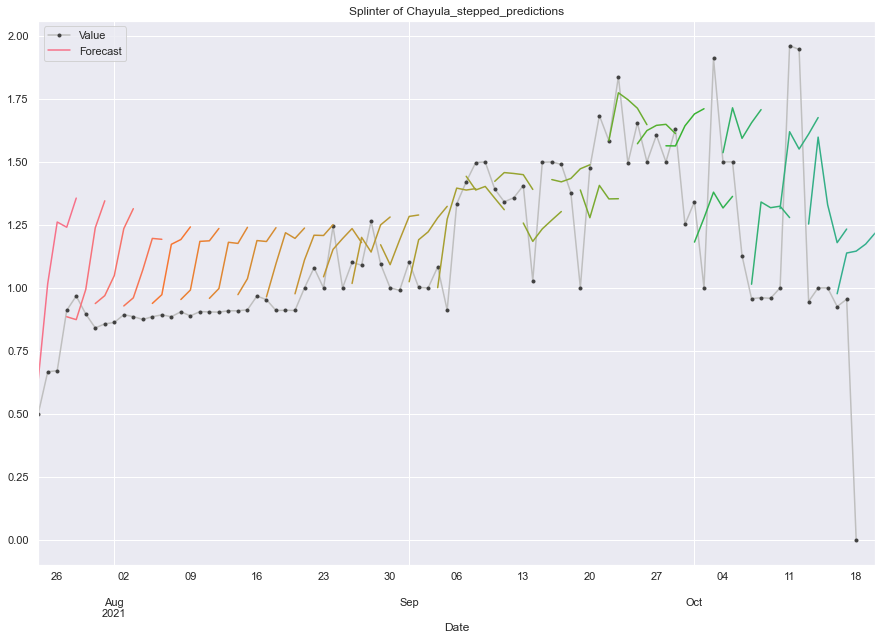

-------------------------------------
Prime Sextant


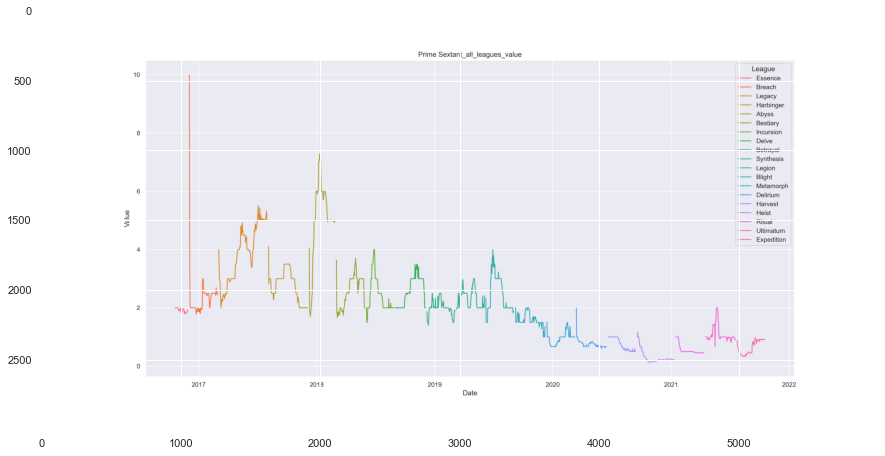

Result - MSE:  0.037591546759917834  - MAPE:  0.03237953064906933
Result - MSE:  0.018104273726111036  - MAPE:  0.15601722502130136


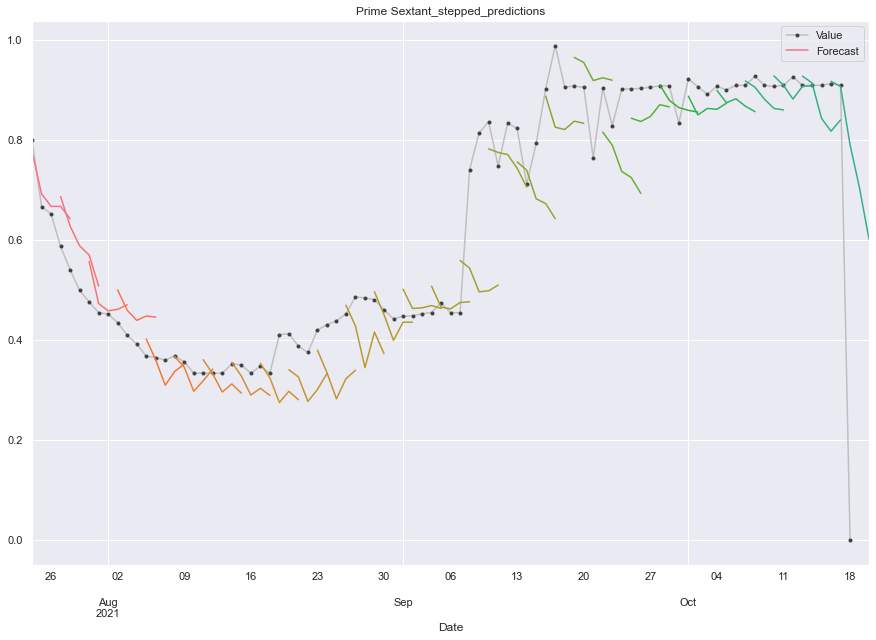

-------------------------------------


In [25]:
tier = 'low'
for currency_name in choosen_currency[tier]:
    pipeline_process(tier, currency_name)
    print('-------------------------------------')

### Tier: Medium

Divine Orb


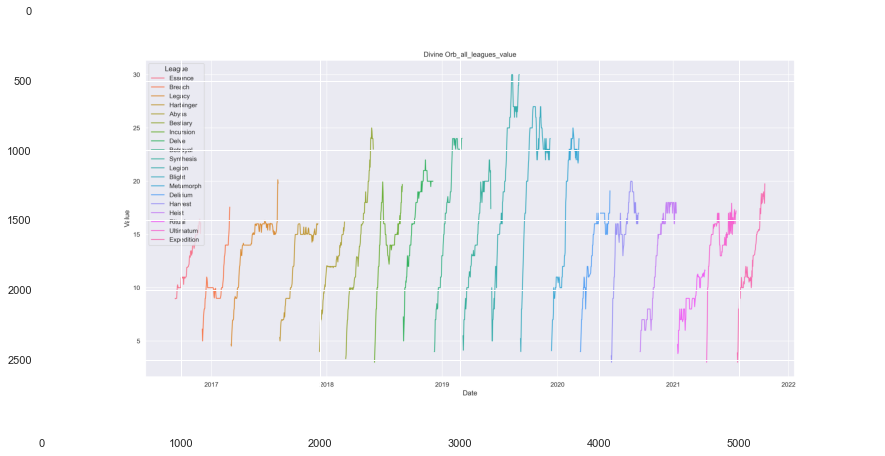

Result - MSE:  0.46709265131814776  - MAPE:  0.02110018111839439
Result - MSE:  5.728552636717645  - MAPE:  0.13273521557917364


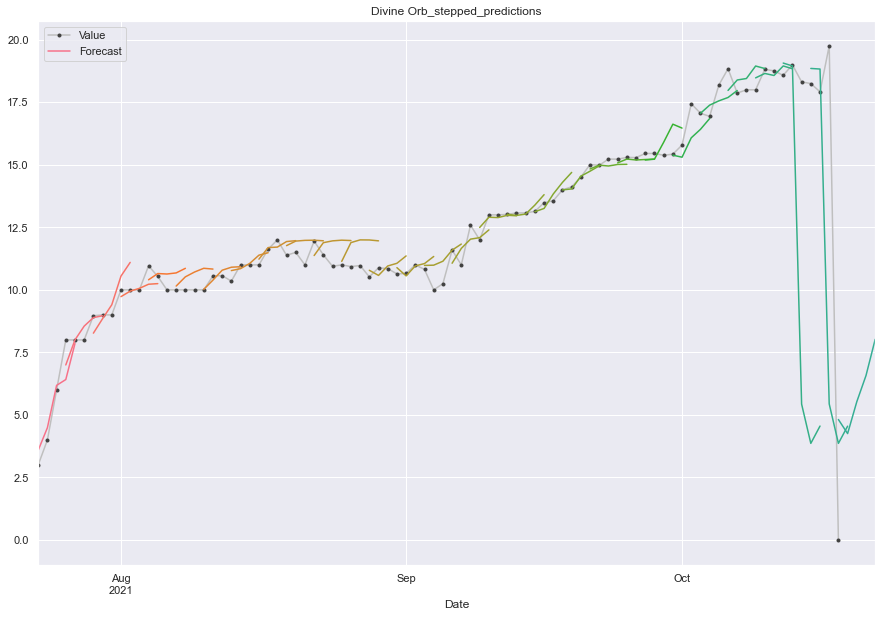

-------------------------------------
Xoph's Breachstone


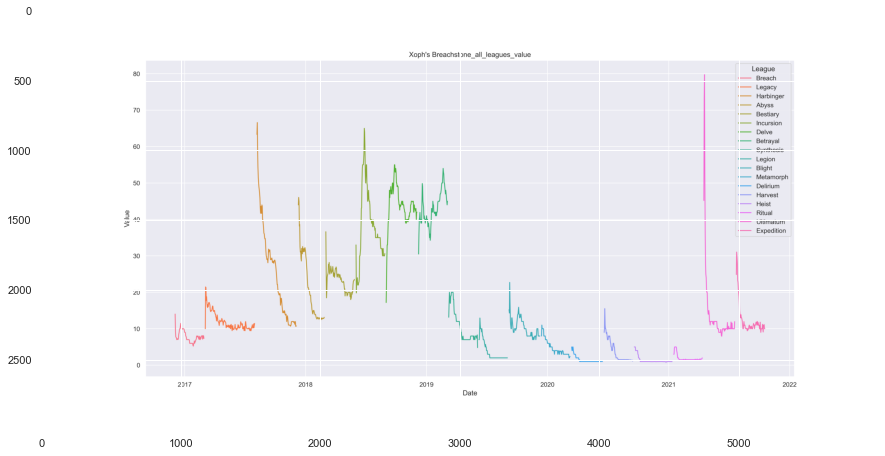

Result - MSE:  4.5734581966191765  - MAPE:  0.03307277289233851
Result - MSE:  4.283030719677641  - MAPE:  0.10026563981589227


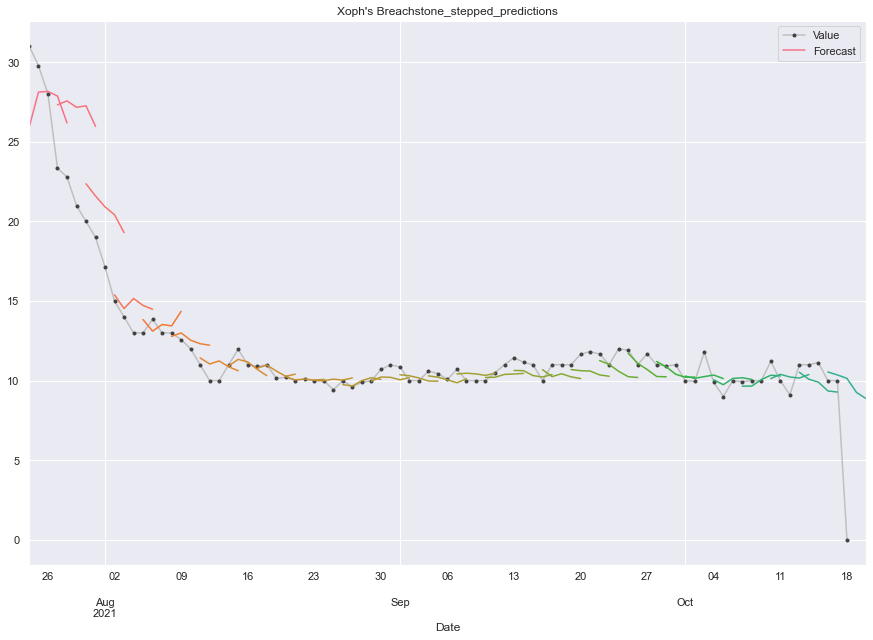

-------------------------------------
Mortal Ignorance


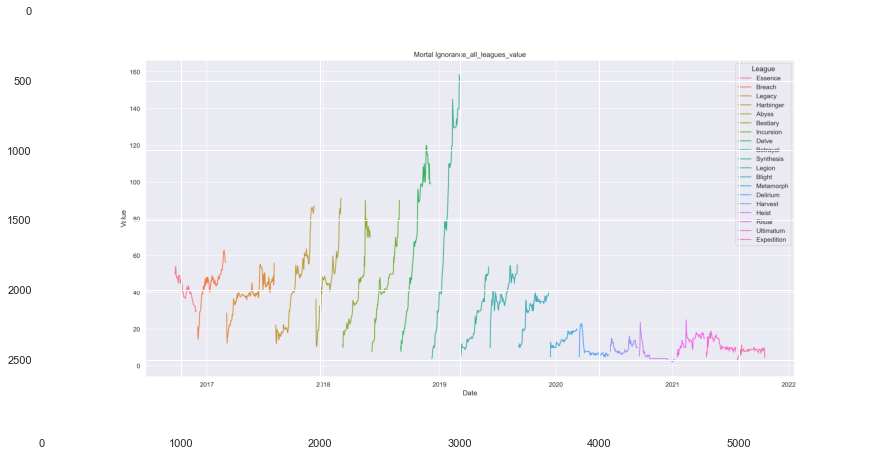

Result - MSE:  9.542236778815262  - MAPE:  0.04047455958744388
Result - MSE:  8.648157470374532  - MAPE:  0.12346843244804293


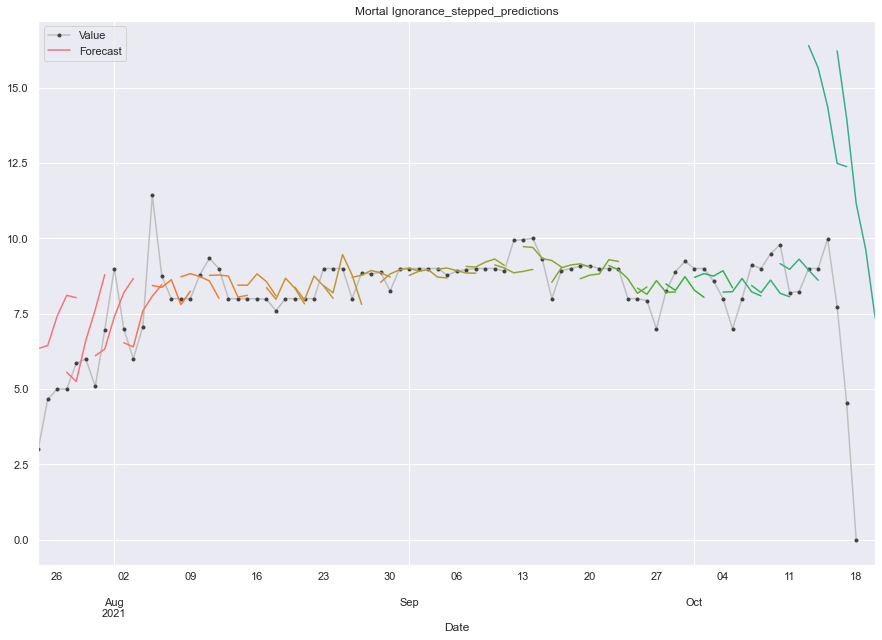

-------------------------------------


In [26]:
tier = 'medium'
for currency_name in choosen_currency[tier]:
    pipeline_process(tier, currency_name)
    print('-------------------------------------')

### Tier: High

Chayula's Breachstone


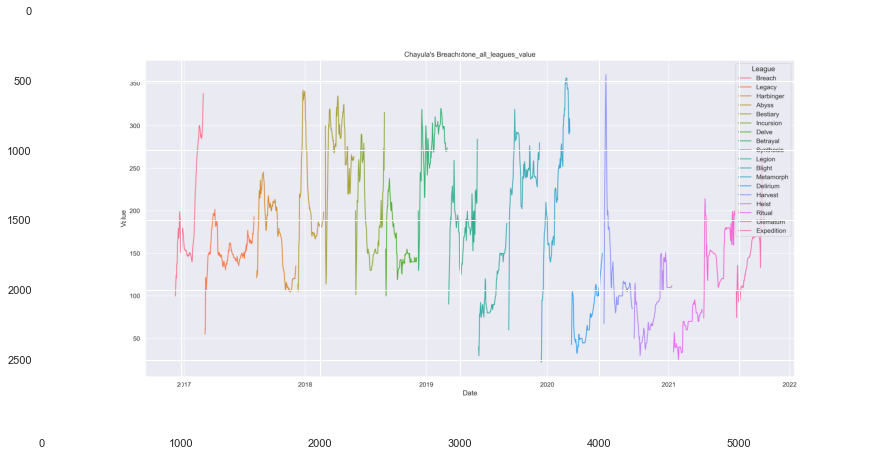

Result - MSE:  187.01318044047989  - MAPE:  0.0378311631807564
Result - MSE:  614.9863050611569  - MAPE:  0.0900628128018955


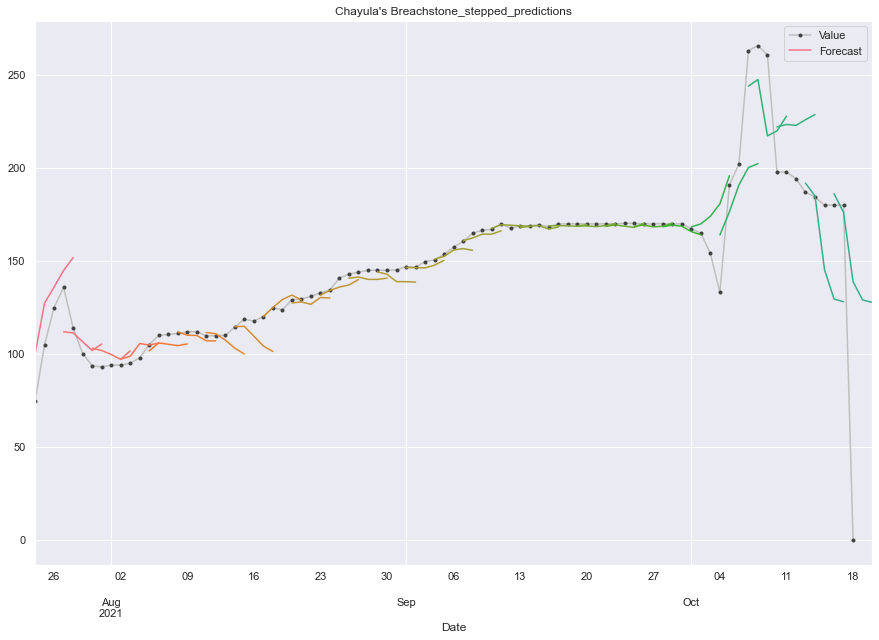

-------------------------------------
Blessing of Chayula


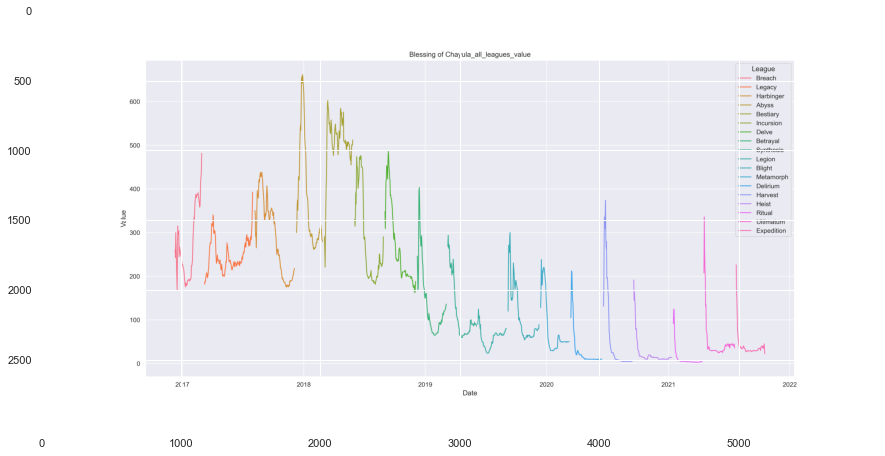

Result - MSE:  334.6203140898112  - MAPE:  0.0395333498967535
Result - MSE:  1092.9203119851604  - MAPE:  0.363981623275868


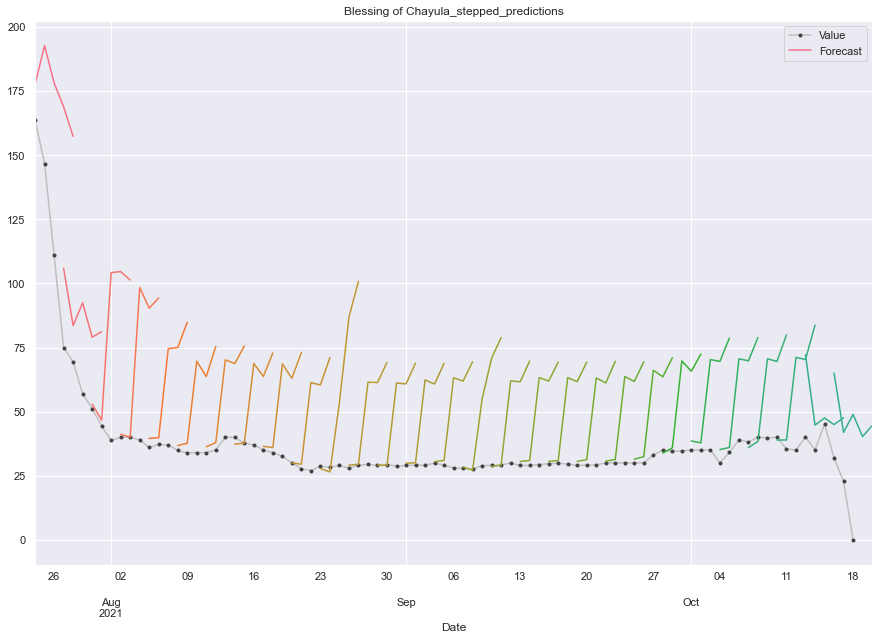

-------------------------------------


In [27]:
tier = 'high'
for currency_name in choosen_currency[tier]:
    pipeline_process(tier, currency_name)
    print('-------------------------------------')